In [1]:
import os
import sys
import random
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

from design_gene_blocks import DesignEblocks


# # For plasmid viewing
# import biotite.sequence as seq
# import biotite.sequence.io.genbank as gb
# import biotite.sequence.graphics as graphics
# import biotite.database.entrez as entrez
# from biotite.sequence import Feature, Location, Annotation

# !pip3 install openpyxl

# from eblocks import Mutation, Eblocks, EblockDesign, Sequence
from mutation import Mutation
from sequence import Plasmid
from eblocks import Eblocks, EblockDesign
from primer import DesignPrimers
from plot import Plot

%load_ext autoreload
%autoreload 2

# !pip install dna_features_viewer

In [2]:
mutation_instance = Mutation()
fp = r"C:\Users\Rosan\Documents\git\my_repositories\design_gene_blocks\tutorial\output\mutations_random_Msmeg_DnaE1_N27_2023-12-05.txt"
result = mutation_instance.parse_mutations(fp)
print(len(mutation_instance.mutations))

sequence_instance = Plasmid()
sequence_instance.parse_sequence(r"C:\Users\Rosan\Documents\git\my_repositories\design_gene_blocks\tutorial\files\A0QX55.fasta")
sequence_instance.parse_vector(r"C:\Users\Rosan\Documents\git\my_repositories\design_gene_blocks\tests\files\snapgene_vector_valid_1.dna")
print(sequence_instance.sequence)
print(sequence_instance.seqid)

27
atgagcggttcatctgcggggtcctccttcgtgcacctgcacaaccacaccgagtattcgatgctggacggtgccgcgaagatcacgcccatgctcgccgaggtggagcggctggggatgcccgcggtggggatgaccgaccacggaaacatgttcggtgccagcgagttctacaactccgcgaccaaggccgggatcaagccgatcatcggcgtggaggcatacatcgcgccgggctcgcggttcgacacccggcgcatcctgtggggtgaccccagccaaaaggccgacgacgtctccggcagcggctcctacacgcacctgacgatgatggccgagaacgccaccggtctgcgcaacctgttcaagctgtcctcgcatgcttccttcgagggccagctgagcaagtggtcgcgcatggacgccgagctcatcgccgaacacgccgagggcatcatcatcaccaccggatgcccgtcgggggaggtgcagacccgcctgcggctcggccaggatcgggaggcgctcgaagccgcggcgaagtggcgggagatcgtcggaccggacaactacttccttgagctgatggaccacgggctgaccatcgaacgccgggtccgtgacggtctgctcgagatcggacgcgcgctcaacattccgcctcttgccaccaatgactgccactacgtgacccgcgacgccgcccacaaccatgaggctttgttgtgtgtgcagaccggcaagaccctctcggatccgaatcgcttcaagttcgacggtgacggctactacctgaagtcggccgccgagatgcgccagatctgggacgacgaagtgccgggcgcgtgtgactccaccttgttgatcgccgaacgggtgcagtcctacgccgacgtgtggacaccgcgcgaccggatgcccgtgtttccggtgcccgatgggcatgaccaggcgtcctggctgcgtcacgaggtggacgccgggcttcgccggcgat

In [3]:
eblocks_instance = Eblocks()
design_instance = EblockDesign(eblocks_instance=eblocks_instance,
                               mutation_instance=mutation_instance,
                               sequence_instance=sequence_instance,)

design_instance.run_design_eblocks()

# TODO Remove print statements (add verbose option to functions)

Optimizing based on price per bp ...
Lowest cost: 2067.15 with cluster {2: [1401, 1773, 1425, 1374, 1272, 1368, 1977, 1719, 2172], 0: [2424, 2508, 3264, 2790, 3366, 2670, 2607, 3456, 2283, 2286, 2319, 2361, 2349, 2667, 2670, 2673, 2676, 2679, 2682, 2685], 1: [834, 504, 552, 852, 516, 561, 666, 636, 261, 327, 351, 672, 675]}
cga
gag
ctg
gaa
cgg
gag
atc
gac
ttc
acc
atc
gat
acc
gac
atc
gat
gac
gct
atc
gtc
mut_1: 561
mut_1: 666
mut_1: 636
gga
ctt
gag
mut_1: 2283
mut_1: 2286
mut_1: 2319
mut_1: 2361
mut_1: 2349
aac
ggg
gac
cat
ttc
mut_1: 261
mut_1: 327
mut_1: 351
atc
acg
ggt
tgg
gtg
acc
tcg
Finished.


In [4]:
plot_instance = Plot(mutation_instance=mutation_instance,
                     eblocks_design_instance=design_instance,
                     sequence_instance=sequence_instance,
                     output_dir=r"C:\Users\Rosan\Documents\git\my_repositories\design_gene_blocks\tutorial\output")

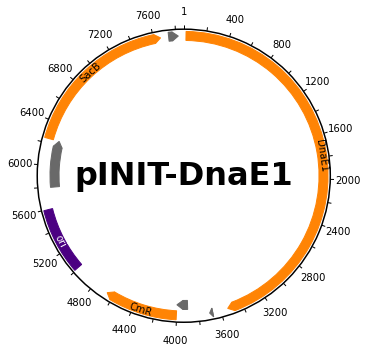

(<PolarAxesSubplot:>, <Figure size 720x360 with 1 Axes>)

In [5]:
plot_instance.show = True

plot_instance.plot_vector(figsize=(10, 5))

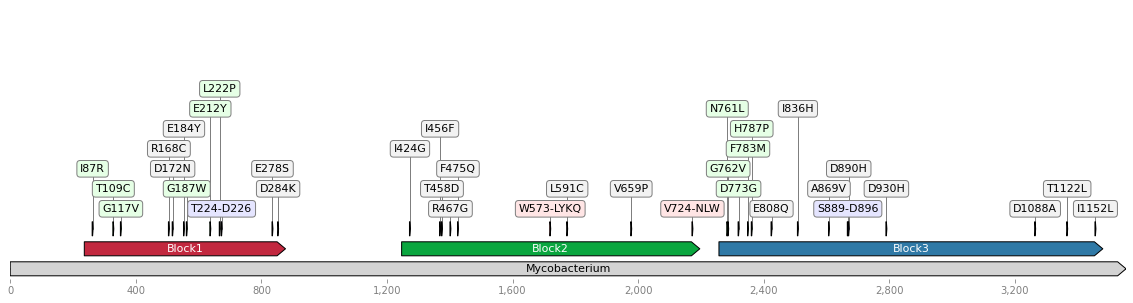

In [6]:
plot_instance.plot_eblocks_mutations(figure_length=20,
                                     figure_width=5)

# TODO Be consistent with the figuresieze and figsize figure length, figure width as input arguments

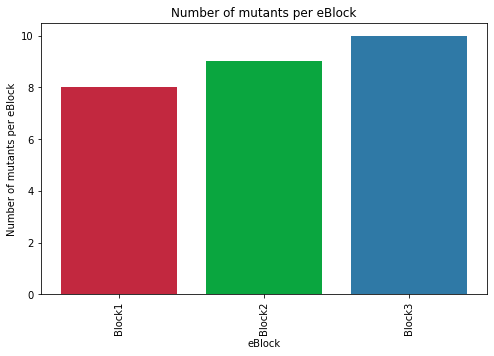

In [7]:
plot_instance.plot_histogram_mutations()

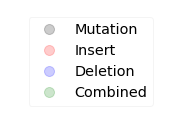

In [8]:
plot_instance.plot_mutation_legend()

In [9]:
# Now design primers

primers_instance = DesignPrimers(mutation_instance=mutation_instance,
                                 eblock_instance=eblocks_instance,
                                 eblocks_design_instance=design_instance,
                                 sequence_instance=sequence_instance)

primers_instance.run_IVAprimer()

Complementarity between the IVA primers for Block_2_pos_1247_2197 exceeds threshold of 4


,Eblock,fw_sequence,rv_sequence,FW Overhang,FW Template,RV Overhang,RV Template,Tm FW Template,Tm Rv Template,Tm FW Overhang,Tm RV Overhang,end position,begin position,FW Primer,RV Primer
0,Block_1_pos_236_877,"(a, t, g, a, g, c, g, g, t, t, c, a, t, c, t, ...",tactcgccaagtagacgccccaggaggaagcacgtggacgtgttgg...,"(g, a, t, c, g, c, c, g, a, a, c, g, g, g)","(t, g, c, a, g, t, c, c, t, a, c, g, c, c, g, ...",gagcgccaagctgtg,ctccgtatgtagcgcggccc,59.16,59.71,48.02,49.71,877,236,"(g, a, t, c, g, c, c, g, a, a, c, g, g, g, t, ...",gagcgccaagctgtgctccgtatgtagcgcggccc
1,Block_2_pos_1247_2197,"(a, t, g, a, g, c, g, g, t, t, c, a, t, c, t, ...",tactcgccaagtagacgccccaggaggaagcacgtggacgtgttgg...,"(g, c, c, c, g, c, g, c, c, g)","(a, c, a, t, t, c, t, a, c, g, c, a, a, g, g, ...",gtggagctacgggct,ccaaggagttggggctcgc,59.81,57.48,46.18,48.80,2197,1247,"(g, c, c, c, g, c, g, c, c, g, a, c, a, t, t, ...",gtggagctacgggctccaaggagttggggctcgc
2,Block_3_pos_2258_3481,"(a, t, g, a, g, c, g, g, t, t, c, a, t, c, t, ...",tactcgccaagtagacgccccaggaggaagcacgtggacgtgttgg...,"(g, g, c, a, c, t, t, g, a, t, c, a, g, t, c, ...","(t, g, c, g, g, g, t, g, a, c, g, c, c, g, t, c)",gaagaggctaccgtacg,cacgacctcttcctcaagctccc,57.09,58.72,48.41,48.13,3481,2258,"(g, g, c, a, c, t, t, g, a, t, c, a, g, t, c, ...",gaagaggctaccgtacgcacgacctcttcctcaagctccc


In [ ]:
from Bio.SeqUtils import MeltingTemp as mt
sequence = 'atgagcggtt'
print(round(mt.Tm_NN(sequence), 2))

25.67


41.98 11 cgccgaacggg 877 atgagcggttcatctgcggggtcctccttcgtgcacctgcacaaccacaccgagtattcgatgctggacggtgccgcgaagatcacgcccatgctcgccgaggtggagcggctggggatgcccgcggtggggatgaccgaccacggaaacatgttcggtgccagcgagttctacaactccgcgaccaaggccgggatcaagccgatcatcggcgtggaggcatacatcgcgccgggctcgcggttcgacacccggcgcatcctgtggggtgaccccagccaaaaggccgacgacgtctccggcagcggctcctacacgcacctgacgatgatggccgagaacgccaccggtctgcgcaacctgttcaagctgtcctcgcatgcttccttcgagggccagctgagcaagtggtcgcgcatggacgccgagctcatcgccgaacacgccgagggcatcatcatcaccaccggatgcccgtcgggggaggtgcagacccgcctgcggctcggccaggatcgggaggcgctcgaagccgcggcgaagtggcgggagatcgtcggaccggacaactacttccttgagctgatggaccacgggctgaccatcgaacgccgggtccgtgacggtctgctcgagatcggacgcgcgctcaacattccgcctcttgccaccaatgactgccactacgtgacccgcgacgccgcccacaaccatgaggctttgttgtgtgtgcagaccggcaagaccctctcggatccgaatcgcttcaagttcgacggtgacggctactacctgaagtcggccgccgagatgcgccagatctgggacgacgaagtgccgggcgcgtgtgactccaccttgttgatcgccgaacgggtgcagtcctacgccgacgtgtggacaccgcgcgaccggatgcccgtgtttccggtgcccgatgggcatgaccaggcgtcctggctgcgtcacgaggtg

,Eblock,fw_sequence,rv_sequence,FW Overhang,FW Template,RV Overhang,RV Template,Tm FW Template,Tm Rv Template,Tm FW Overhang,Tm RV Overhang,end position,begin position,FW Primer,RV Primer
0,Block_1_pos_236_877,"(a, t, g, a, g, c, g, g, t, t, c, a, t, c, t, ...",tactcgccaagtagacgccccaggaggaagcacgtggacgtgttgg...,"(g, a, t, c, g, c, c, g, a, a, c, g, g, g)","(t, g, c, a, g, t, c, c, t, a, c, g, c, c, g, ...",gagcgccaagctgtg,ctccgtatgtagcgcggccc,59.16,59.71,48.02,49.71,877,236,"(g, a, t, c, g, c, c, g, a, a, c, g, g, g, t, ...",gagcgccaagctgtgctccgtatgtagcgcggccc
1,Block_2_pos_1247_2197,"(a, t, g, a, g, c, g, g, t, t, c, a, t, c, t, ...",tactcgccaagtagacgccccaggaggaagcacgtggacgtgttgg...,"(g, c, c, c, g, c, g, c, c, g)","(a, c, a, t, t, c, t, a, c, g, c, a, a, g, g, ...",gtggagctacgggct,ccaaggagttggggctcgc,59.81,57.48,46.18,48.80,2197,1247,"(g, c, c, c, g, c, g, c, c, g, a, c, a, t, t, ...",gtggagctacgggctccaaggagttggggctcgc
2,Block_3_pos_2258_3481,"(a, t, g, a, g, c, g, g, t, t, c, a, t, c, t, ...",tactcgccaagtagacgccccaggaggaagcacgtggacgtgttgg...,"(g, g, c, a, c, t, t, g, a, t, c, a, g, t, c, ...","(t, g, c, g, g, g, t, g, a, c, g, c, c, g, t, c)",gaagaggctaccgtacg,cacgacctcttcctcaagctccc,57.09,58.72,48.41,48.13,3481,2258,"(g, g, c, a, c, t, t, g, a, t, c, a, g, t, c, ...",gaagaggctaccgtacgcacgacctcttcctcaagctccc
3,Block_1_pos_236_877,"(a, t, g, a, g, c, g, g, t, t, c, a, t, c, t, ...",tactcgccaagtagacgccccaggaggaagcacgtggacgtgttgg...,"(g, a, t, c, g, c, c, g, a, a, c, g, g, g)","(t, g, c, a, g, t, c, c, t, a, c, g, c, c, g, ...",gagcgccaagctgtg,ctccgtatgtagcgcggccc,59.16,59.71,48.02,49.71,877,236,"(g, a, t, c, g, c, c, g, a, a, c, g, g, g, t, ...",gagcgccaagctgtgctccgtatgtagcgcggccc
4,Block_2_pos_1247_2197,"(a, t, g, a, g, c, g, g, t, t, c, a, t, c, t, ...",tactcgccaagtagacgccccaggaggaagcacgtggacgtgttgg...,"(g, c, c, c, g, c, g, c, c, g)","(a, c, a, t, t, c, t, a, c, g, c, a, a, g, g, ...",gtggagctacgggct,ccaaggagttggggctcgc,59.81,57.48,46.18,48.80,2197,1247,"(g, c, c, c, g, c, g, c, c, g, a, c, a, t, t, ...",gtggagctacgggctccaaggagttggggctcgc
5,Block_3_pos_2258_3481,"(a, t, g, a, g, c, g, g, t, t, c, a, t, c, t, ...",tactcgccaagtagacgccccaggaggaagcacgtggacgtgttgg...,"(g, g, c, a, c, t, t, g, a, t, c, a, g, t, c, ...","(t, g, c, g, g, g, t, g, a, c, g, c, c, g, t, c)",gaagaggctaccgtacg,cacgacctcttcctcaagctccc,57.09,58.72,48.41,48.13,3481,2258,"(g, g, c, a, c, t, t, g, a, t, c, a, g, t, c, ...",gaagaggctaccgtacgcacgacctcttcctcaagctccc


In [12]:
sequence_instance.sequence

df = 

df.head()

SystemExit: 

c:\Users\Rosan\Anaconda3\envs\eblocks_3\lib\site-packages\IPython\core\interactiveshell.py:3351: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
